Progress report (5%) – due 11:59pm on November 7th
The progress report is a chance for you to take stock of how far you have come and to reflect on whether or not you are comfortable with the substance or scope of your final project. The format of the progress report will be a Jupyter notebook that should be uploaded to the private github repository you have set up for your team. It should include:
- Include a link to your github project repository located in the Github Classroom designated for this course. We will check whether your github repository is created in the classroom set up for the course and whether all team members have been added there.

- Project introduction: an introduction that discusses the data you are analyzing, and the question or questions you are investigating.
- Any changes: a discussion whether your scope has changed since the check-in proposal slides. What did you aim to do that you will not do and what have you added to the project?
- Data cleaning: show clearly how you cleaned your data.
- Exploratory data analysis: explain what your data looks like (words are fine, but visualizations are often better). Include any interesting issues or preliminary conclusions you have about your data.
- At least one visualization that tests an interesting hypothesis, along with an explanation about why you thought this was an interesting hypothesis to investigate.
- At least one ML analysis on your dataset, along with a baseline comparison and an interpretation of the result that you obtain.
- Reflection: a discussion of the following:
    - What is the hardest part of the project that you’ve encountered so far?
    - What are your initial insights?
    - Are there any concrete results you can show at this point? If not, why not?
    - Going forward, what are the current biggest problems you’re facing?
    - Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
    - Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?
- Roles/Coordination (important): Who will be responsible for specific portions of the project (at least two for each portion is recommended): e.g., finding data sources, cleaning, statistical analysis, visualization, machine learning applications, etc.? What deadlines should various components of the project be completed by?
- Next steps: What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.

What you need to submit: A PDF of your Jupyter notebook to Gradescope which includes a link to the notebook located in your repository (the two notebooks should look the same).

How this part will be graded: the amount of progress that has been made, clarity of exposition. There will be a grade assigned to the whole progress report that everyone receives, and a grade assigned to you individually based on your github code contributions.


Github Link: https://github.com/cs418-fa24/project-check-in-team-8 

PROJECT INTRODUCTION(MANU): 

Our project centers around analyzing NFL data from the 2024 season to uncover predictive indicators for Super Bowl success. By utilizing machine learning models, we aim to determine which team statistics correlate most strongly with playoff wins. Specifically, we’re investigating offensive stats like Passing Yards, Rushing Yards, and Receiving Yards, alongside defensive metrics such as Tackles and Interceptions, and team performance in terms of wins. This data is collected from ESPN using web scraping tools, then organized in a pandas DataFrame and exported to a CSV file for further analysis. Additionally, we’re delving into draft pick histories to evaluate the performance of quarterbacks based on their draft position, comparing higher and lower picks, and examining if backup quarterbacks outperform starters in the long run.

ANY CHANGES(MANU): 

Since our initial proposal, we’ve refined the project scope to focus more narrowly on key offensive and defensive stats, instead of incorporating a wider array of advanced metrics. After discussing with our professor, we agreed to focus on six main statistics to ensure clarity in our analysis and predictive models. We’ve also added a historical comparison of quarterback draft picks, specifically those from 2015 to 2021, to explore if lower-drafted quarterbacks outperform higher picks over time and if backup quarterbacks show better performance metrics than starters. By narrowing our scope and adding these focused research questions, we aim to produce a robust and targeted analysis of what it takes to build a Super Bowl-winning team.

DATA CLEANING(GAGE): 

Since data was collected in a collaborative effort, most of the initial work that was required for further analysis consisted of combining the respective datasets into one CSV file, as well as cleaning the data itself. The column names of various initial files contained inconsistencies which had to be dealt with prior to combining ("Pass Attempts" vs "Passing Attempts", "Cmp_Pct" vs "Completion Percentage", etc). Once these files were combined, any potential null values were checked and amended to 0, or the appropriate value.

EXPLORATORY DATA ANALYSIS(GAGE): 

Our primary goal is to explore any correlation between a quarterback’s draft position and their performance as indicated by metrics such as average QBR and win rate. The scatter plot below shows draft pick position on the x-axis and average QBR on the y-axis. A downward trend could indicate that quarterbacks picked earlier tend to have higher QBRs, while a lack of trend might suggest that draft position does not strongly correlate with QBR. Additionally, win rate and passing yards are indicated by the color and size of each dot, respectively. This visualization gives a great initial exploration of the nature of the data and give us a loose understanding from a quick glance: which is to say that quarterbacks that are drafted higher generally experience more success, indicated by their higher win rate, QBR, and passing yardage. Outliers tend to favor underdogs overperforming their value as opposed to the high draft picks failing to meet theirs. One initial assumption/conclusion we have about the data is that it higher picked QBs tend to have higher stats. 

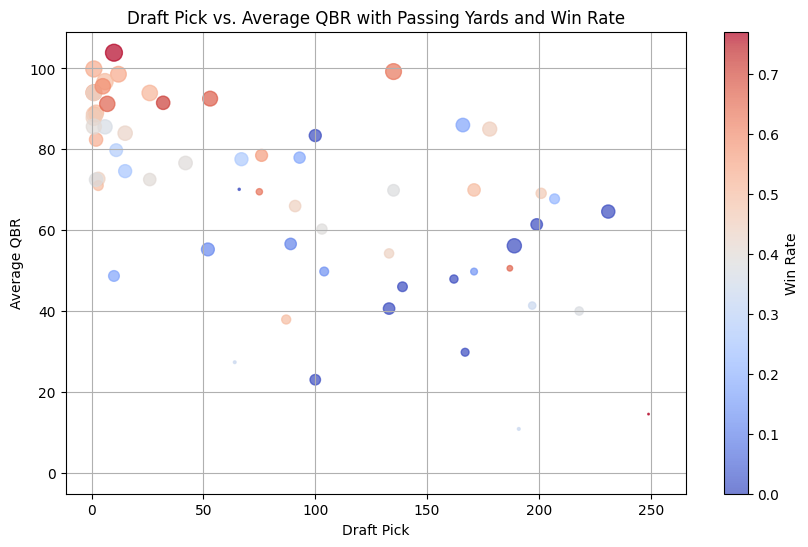

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

combined = pd.read_csv("combinedQBStats.csv")

qb_performance = combined.groupby("Name").agg(
    avg_QBR=("QBR", "mean"),
    avg_passing_yards=("Passing Yards", "mean"),
    draft_pick=("Draft Pick", "first"),
    win_rate=("Game Result (W/L)", lambda x: (x == "W").mean())
).reset_index()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    qb_performance["draft_pick"],
    qb_performance["avg_QBR"],
    s=qb_performance["avg_passing_yards"] * 0.5,  
    c=qb_performance["win_rate"], cmap="coolwarm", alpha=0.7
)

plt.colorbar(scatter, label="Win Rate")
plt.xlabel("Draft Pick")
plt.ylabel("Average QBR")
plt.title("Draft Pick vs. Average QBR with Passing Yards and Win Rate")

plt.grid(True)

plt.show()


The hypothesis here is the idea of seeing a higher QBR when having a higher drafted QB. This visualization takes into account all the years in which the data was collected for. This visualization also seems to prove that case because if we look at the legend we can see a lot of red data points towards the top 25 draft picks. A lot of the blue points however are scattered throughout the plot. However in the general case our hypothesis seems to be valid and correct

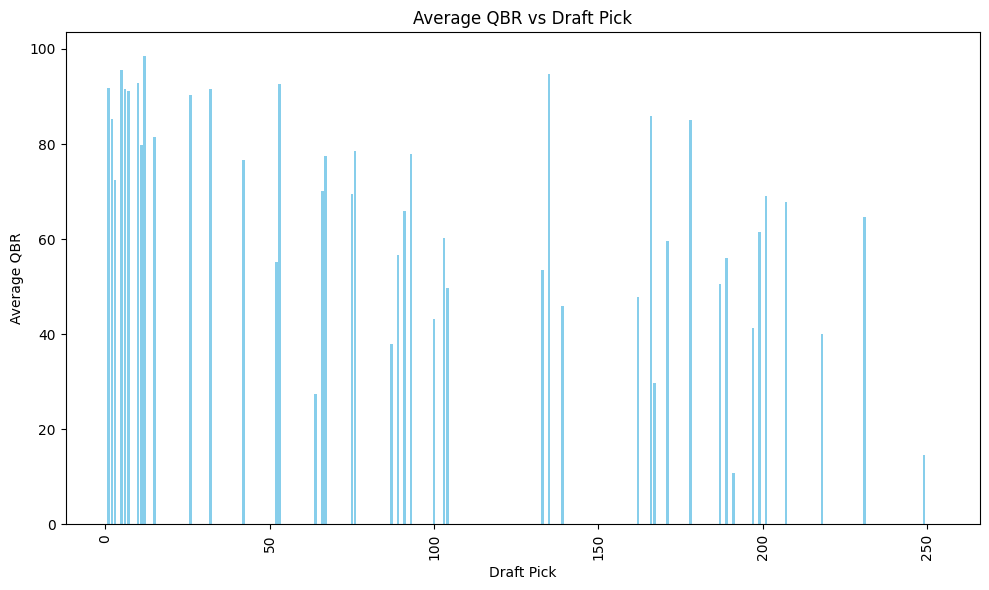

In [10]:
#ONE VISUALIZATOIN(VASU)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns

data = pd.read_csv('combinedQBStats.csv')

# Group by 'Draft Pick' and calculate the average QBR
average_qbr = data.groupby('Draft Pick')['QBR'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_qbr['Draft Pick'], average_qbr['QBR'], color='skyblue')

# Add titles and labels
plt.title('Average QBR vs Draft Pick')
plt.xlabel('Draft Pick')
plt.ylabel('Average QBR')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()



I hypothesized that there would be a relationship between a quarterback’s draft pick and their average QBR, as higher draft picks are generally seen as more talented and expected to perform better. This hypothesis is interesting because it tests whether draft position correlates with on-field performance, specifically the QBR, and whether NFL teams’ draft decisions align with actual quarterback success. The bar chart visualizes the average QBR by draft pick, with the x-axis representing draft pick position and the y-axis showing the corresponding average QBR. If the data shows that earlier draft picks consistently have higher QBRs, it would support the idea that draft position predicts performance. However, any anomalies—such as later-round quarterbacks outperforming higher picks—could suggest that other factors, such as team dynamics or coaching, play a significant role in a quarterback’s success.

C:\Users\vasup\AppData\Roaming\Python\Python312\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


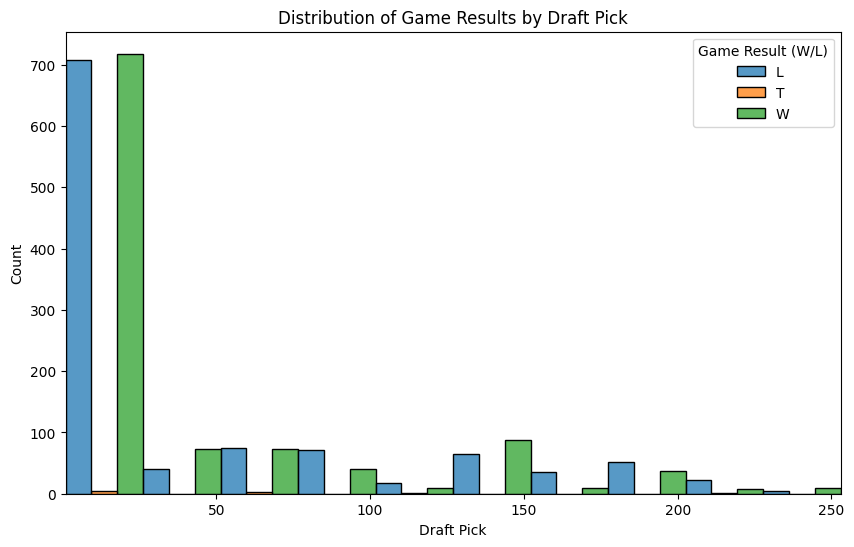

In [11]:
# Another Visualization (Shriniket)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns

nfl_stats = pd.read_csv('combinedQBStats.csv')
df = nfl_stats.groupby(["Draft Pick", "Game Result (W/L)"]).size().reset_index(name='Count')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Draft Pick", weights="Count", hue="Game Result (W/L)", multiple="dodge")
plt.xlabel("Draft Pick")
plt.ylabel("Count")
plt.title("Distribution of Game Results by Draft Pick")
plt.xlim(1, df["Draft Pick"].max())
plt.show()

A Hypothesis That we had when it come to Draft Picks was whether they were Winning or Not. Our original hypothesis is that Higher Draft picks will likely lose more than they win. This visualization shows us the count of Wins/Losses/ties for Draft Picks at certain numbers which helps us validate the hypothesis that we had in this situation. This hypothesis seemed to be proven somewhat incorrect as it seems to be a 50-50 chance. One other assumption we had was that QB's chosen later in the draft will likely win more, because generally good teams select in the later rounds at later spots. Although sample sizes are different for the draft picks a lot of the data is even which further validates this hypothesis. 

In [12]:
#ML ANALYSIS(SHRINIKET AND CARLOS)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, LogisticRegression

nfl_qb_stats = pd.read_csv('combinedQBStats.csv')

mean_qbr_by_draft_pick = nfl_qb_stats.groupby("Draft Pick")[["QBR"]].mean().reset_index()
# print(mean_qbr_by_draft_pick)
X = mean_qbr_by_draft_pick["Draft Pick"].values.reshape(-1, 1)
y = mean_qbr_by_draft_pick[["QBR"]]

## Actual Model being used
linear_regression = LinearRegression()
linear_regression.fit(X, np.ravel(y))
linear_model_predictions = linear_regression.predict(X)
print(f"Linear Model predictions {linear_model_predictions}")

## Baseline model
m = -1
b = 90
list_of_y = []
for i in X:
    y = m * (i[0]) + b
    if y < 0:
        list_of_y.append(0)
    else:
        list_of_y.append(int(y))

print(f"Baseline Model {list_of_y}")
# for i in range(1, 250):
#     print(linear_regression.predict(X))

Linear Model predictions [84.73062916 84.52711105 84.32359295 83.91655673 83.71303863 83.50952052
 82.8989662  82.6954481  82.49192999 81.88137567 79.64267651 78.42156787
 76.38638681 74.35120575 74.14768765 71.90898848 71.50195227 71.29843416
 69.67028932 69.46677121 67.22807205 66.82103583 66.41399962 66.00696341
 64.58233667 63.97178235 63.76826424 62.95419182 57.86623917 57.45920296
 56.64513054 51.9642141  51.15014167 50.94662357 50.13255114 48.7079244
 46.87626145 46.46922524 46.06218902 44.84108039 44.43404418 44.02700797
 42.80589933 40.56720016 37.92146479 34.25813888 33.44406645]
Baseline Model [89, 88, 87, 85, 84, 83, 80, 79, 78, 75, 64, 58, 48, 38, 37, 26, 24, 23, 15, 14, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Based on the "predicted" results for the baseline model and Linear regression it seems that Linear regression seems to be better suited for our dataset. We are looking for results where stats are among the highest when draft picks are higher. We are using QBR in this situation although most stats should be higher when given a high draft pick (except for interceptions). The baseline model goes to 0 after a certain arbitary draft pick, when there could always exist anomalies or outliers. Since football is such a dynamic sport, outliers are  present and linear regression accounts for this. Thus linear regression is the best ML model for this situation. 

REFLECTION(ZEESHAN): 

Some difficulties with the project so far have been the large variance within the data, as our sample size is focused on just quarterbacks over the last few years. Because of the constantly changing offensive environment in the league, it's difficult to compare across eras which means our data must be concentrated on modern QBs. This in turn limits the amount of data we can use to compare and make valid conclusions with. The initial insights we've seen have matched up with logical thinking; quarterbacks who were drafted higher have, on average, higher passer ratings. This would make sense as a higher draft pedigree usually correlates with better performance in the league. There's also a large concentration of QBs who are taken very early in the draft, thinning out in occurrence as the rounds progress. This also lines up with conventional football wisdom, which deems the quarterback the most valuable player on the team. Even those who are not worth high draft pick capital are taken earlier than an equivalent skill player because of the positional value. 

Some issues which could prevent further data exploration include the aforementioned variance within our data set, which could cause some data analysis to be flawed. This shouldn't be an issue if we focus on game-by-game stats and comparisons, as we have plenty of those. But overall career comparisons become much trickier. There's also a lot of context which is sometimes necessary to evaluate performance, which can't be quantified. Injuries can limit a start and cut the statistical numbers down, which isn't accounted for. Overall though, it should'nt pose a big issue and we are on track with our project. 

Based on the initial exploration of the data, it seems that proceeding with the project could still be valuable, but there are important considerations that could affect its effectiveness. If the results from the first exploratory analysis, such as the relationship between draft pick and average QBR, appear to show weak or inconsistent patterns, it might suggest that the draft pick alone is not a strong indicator of a quarterback's performance.

If the results are not promising, the project could be adjusted to focus on more comprehensive factors. For example, instead of focusing solely on draft pick, we could explore the relationship between performance metrics (like passing yards, touchdowns, interceptions, etc.) and QBR, or even expand the analysis to include the impact of external factors such as the team’s offensive line, coaching staff, or even injury history. Additionally, we could consider a more granular approach by investigating individual quarterback performance over time, using machine learning models to predict success based on a combination of factors.

This revised approach could yield more meaningful insights, as it accounts for the complexity of quarterback performance and avoids oversimplifying the role of draft pick in determining success. A multi-variable model or even a deep dive into performance trends across seasons might offer clearer predictors for success in the NFL. By incorporating a wider range of variables, we can improve the robustness of the analysis and provide more actionable insights for both player evaluation and team management. Therefore, the revised scope would enhance the project by considering a more realistic and holistic view of factors influencing quarterback performance.

ROLES/COORDINATION(VASU): 

Data Acquisition: Shriniket identified a website to scrape NFL quarterbacks' stats, setting the foundation for our data collection. To streamline the process, Shriniket and Vasu created a Google Sheet outlining the structure of the final dataset, specifying the columns and details required for each quarterback. With data needed for the years 2015-2021, we divided the task among our seven team members, each assigned to scrape data for a specific year. Once all members had gathered their data and saved it into individual CSV files, Shriniket and Gage consolidated these files into a single master CSV, creating a comprehensive dataset for our analysis.

Vasu is responsible for co-managing the project, ensuring that everything runs smoothly and that tasks are completed on schedule. He assigns tasks to each team member, monitors their progress, and follows up to ensure deadlines are met. In addition to overseeing the workflow, Vasu also creates data visualizations based on the master CSV file assembled by the group, helping to bring insights from the data to life.

Shriniket is responsible for co-managing the project, ensuring that everything runs smoothly and that tasks are completed on schedule and to identify a reliable website for scraping NFL quarterback game-by-game statistics from 2015 to 2021. Additionally, he is responsible for conducting machine learning analysis on the dataset, establishing a baseline comparison, and interpreting the results to provide insights into the group’s findings.

Gage's role is to compile all the individual CSV files created by the group during data scraping of NFL quarterback statistics, ensuring the data is cleaned by removing duplicate rows and handling any null values. He is also responsible for conducting exploratory data analysis to uncover patterns and insights within the dataset.

Manu’s role involves gathering NFL quarterback data for her assigned year and converting it into a CSV file. She is also responsible for writing the project introduction and updating the "Changes" section in the progress report as needed. She is also responsible for conducting exploratory data analysis to uncover patterns and insights within the dataset.

Yugesh is tasked with gathering NFL quarterback data for his assigned year, converting it into a CSV file as part of the group’s dataset spanning from 2015 to 2021. Additionally, he is responsible for outlining the next steps for the project, brainstorming objectives for the upcoming month, and defining how the team will assess if the project meets its intended goals.

Zeeshan is responsible for extracting NFL quarterback data for his assigned year within the dataset spanning 2015 to 2021 and saving it as a CSV file for integration into the project’s master dataset. Additionally, he will manage the Reflection section of the progress report, covering the following key points. Zeeshan's reflections will provide insight into the project’s progress, the team’s direction, and any potential pivots needed to achieve the project’s goals.

Carlos is responsible for extracting NFL quarterback data for his assigned year within the 2015-2021 dataset and saving it as a CSV file for inclusion in the project’s master dataset. In addition to data collection, Carlos will support Shriniket in performing the machine learning analysis on the combined data. This involves helping with model selection, tuning parameters, and conducting a baseline comparison, as well as interpreting the results to generate insights for the group.


NEXT STEPS(YUGESH):

### Next Steps for the Upcoming Month

**1. Data Cleaning and Preparation:**
   - **Remove Irrelevant Columns:** Eliminate any columns that don’t contribute directly to understanding the relationship between draft position and performance. This includes:
     - Dropping `Unnamed: 0` and `Unnamed: 0.1`, which appear to be index columns that add no analytical value.
   - **Handle Missing Data:** Address any missing values in performance metrics, as these may impact aggregate statistics and comparisons.
     - For columns with a small number of missing values, consider filling with median or mean values.
     - For columns with a high number of missing values (like `Pass Completions` and `Passer Rating`), either impute values based on other statistics or drop these if they don’t affect overall conclusions.
   - **Standardize Draft Position:** Make sure draft positions are consistent across all players:
     - Convert draft rounds and picks to a standardized format if necessary.
     - Verify that the “Draft Pick” column accurately represents each player’s selection position.

**2. Aggregation and Feature Engineering:**
   - **Aggregate Performance Metrics:** Since we are interested in long-term performance, aggregate game-level statistics for each quarterback to create career-level metrics. These can include:
     - Total or average passing yards, touchdowns, interceptions, rushing yards, etc.
     - Optional: Calculate per-season or per-game averages to account for varying lengths of careers.
   - **Create Draft Tiers for Comparison:** Divide quarterbacks into draft pick categories to better understand performance across draft levels:
     - Example tiers might include “Top 10,” “11-32” (first round), “Round 2-3,” and “Round 4 or later” picks.
   - **Calculate Additional Metrics as Needed:** For example:
     - Calculate a “career passer rating” as a composite performance metric.
     - Determine each quarterback’s career longevity (e.g., total seasons or games played).

**3. Conduct Exploratory Data Analysis (EDA):**
   - **Visualize Draft and Performance Distributions:** Use histograms or box plots to examine the distribution of draft positions and key performance metrics.
   - **Explore Relationships Between Draft Position and Performance Metrics:** Use scatter plots, bar charts, or line graphs to observe any preliminary trends between draft position (or draft tier) and aggregated performance metrics (e.g., passing yards, touchdowns).
   - **Look for Potential Outliers or Patterns:** Identify any standout players or draft positions with unexpected performance trends, as these might suggest important nuances in the data.

**4. Statistical Testing and Modeling:**
   - **Correlation Analysis:** Calculate the correlation between draft position and key performance statistics to quantify the strength and direction of any relationships.
   - **Hypothesis Testing:** Perform statistical tests (e.g., t-tests or ANOVA) to determine if there are statistically significant differences in performance metrics across draft tiers.
   - **Modeling (Optional):** If feasible, develop a basic regression model to predict performance based on draft position.
     - Use draft pick or tier as the primary predictor and career metrics (e.g., passing yards or touchdowns) as the dependent variable.
     - Evaluate the model’s explanatory power (R²) to understand the extent to which draft position can predict performance.

### Evaluation of Project Success

The project will be evaluated as successful if it accomplishes the following:

1. **Clear Identification of Draft-to-Performance Relationships:**
   - We successfully identify any trends, correlations, or patterns that show whether quarterbacks drafted higher perform better in the long term than those drafted lower.
   - We can quantify and explain these relationships with statistical evidence.

2. **Data-Driven Conclusion to the Research Question:**
   - We reach a clear answer to the question: **Do higher-drafted quarterbacks tend to perform better in the long run?**
   - This includes an interpretation of whether higher draft picks show measurable advantages (or disadvantages) in key metrics over time.

3. **Comprehensive Report with Visualizations and Insights:**
   - Deliver a final report or presentation summarizing our findings, including:
     - Visualizations that illustrate draft distributions, performance metrics, and any identified relationships.
     - Statistical summaries and tests supporting our conclusions.
     - Key insights that clarify the significance of draft position in predicting long-term QB performance.
